# Notebook 'Onde progressive ou rétrograde de form quelconque'

This notebook illustrates the phenomenon of propagation, starting from the d'Alembert solution to the wave equation. 

It was written to illustrate the third exercise of 'TD Ondes'.

Author : Matthieu Hartenstein, matthieu.hartenstein@sorbonne-universite.fr

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

import copy

## 1. Our waveform

Let's define an arbitrary variable $s$. Later, we will call this variable the phase of our wave. 

Now let's define a function $ \nu : s \rightarrow \nu(s)$, a function that has the phase as variable. We will call such a function a waveform. 

In [2]:
def waveform(s):
    s_line = s.transpose()
    amps = np.array([1, 0.7]).reshape(2, 1)
    s0 = np.array([-2, -3]).reshape(2, 1)
    sigma = np.array([0.3, 0.5]).reshape(2, 1)
    gaussians = amps*np.exp(-(s_line - s0)**2/sigma**2)
    return gaussians.sum(axis = 0)

In [3]:
Ns = 1000
s_max = 5
s_vect = np.linspace(-s_max, s_max, Ns)
f = waveform(s_vect)


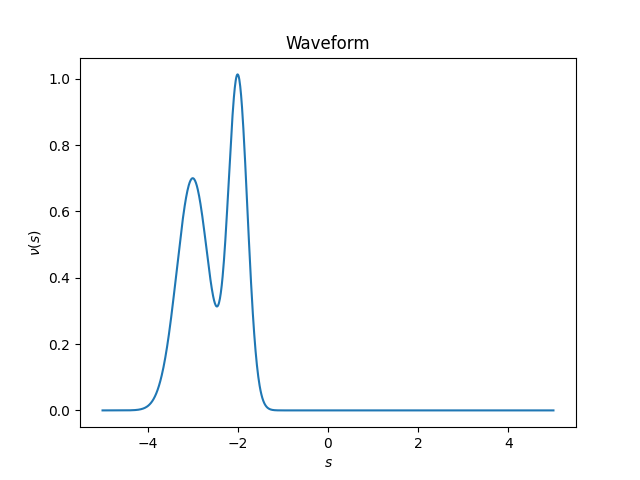

In [4]:
plt.figure(1)
plt.plot(s_vect, f)
plt.xlabel(r'$s$')
plt.ylabel(r'$\nu(s)$')
plt.title('Waveform')
plt.show()

## 2. Propagation of a wave - the d'Alembert solution

Recall the 1D - wave equation:

$$
\dfrac{\partial^2 u}{\partial x ^2} - \frac{1}{c^2} \dfrac{\partial^2 u}{\partial t^2}
$$

In the course, we have seen that a solution $u(x,t)$ to the wave equation can be decomposed as

$$
u(x,t) = f(x-ct) + g(x + ct)
$$

$f(x-ct)$ is called a progressive wave, $g(x+ct)$ is called a retrograde wave. We will see in a minute that the progressive wave is a wave that propagates in the $x$ positive direction, and that the retrograde wave propagates in the negative $x$ direction.

## 3. Propagation of a progressive wave

To simplify our problem, let's assume that all the sources are located on the left part of the $x$-axis and that there is no obstacle to the propagation. Then, it can be assumed that no wave propagates from the right to the left : there is no retrograde wave and we simply have

$$
u(x,t) = f(x-ct).
$$

In what follows, we will assume that our system is an infinite string. 


#### a) Initial condition - picture of the wave at $t_0$

Now let's assume that at $t_0 = 0$, we have 

$$
u(x, t 0) = f(x - c \times 0) = f(x) = \nu(x),
$$

This means that at $t = 0$, if we are able to observe the string on the interval $x \in [-5, 5]$, we will observe the exact same shape as the one that we have drawn in the first figure.

Let's go a little bit deeper into abstraction. For any $x$, let's define $ s(x, t_0) = s_0(x) = x - c t_0 = x $. At $t = t_0 = 0$, the phase of the wave along the $x$ axis is just $x$, and the shape of the wave along this same axis is simply

$$
u(x, t_0) = \nu(x) = \nu(s_0(x)) = \nu(s(x, t_0)).
$$

#### b) Picture of the wave at $t_1 > t_0$

At $t_1 > t_0$, using the $\partial$'Alembert solution and defining $\Delta t = t_1 - t_0$, we get

$$
u(x, t_1) = f(x - c t_1) = f(x - c t_0 - c \Delta t) = \nu(x - c t_0 - c \Delta t) = \nu(x - c \Delta t)
$$

Now let's write the phase at time $t_1$

$$ 
s(x, t_1) = s_1(x) = x - c t_1 = s(x, t_0) - c \Delta t.
$$

The shape of the wave along the $x$ axis at time $t_1$ is

$$
u(x, t_1) = \nu(x - c \Delta t) = \nu(s(x, t_1)) = \nu(s(x, t_0) - c \Delta t).
$$

Let's go back into abstraction. At $t_0$, the point $x_0 = -2$ had the phase $s(x_0, t_0) = x_0 - c t_0 = -2$.

At time $t_1$, to obtain the phase at point $x_1$ will be the same as at point $x_0$ and time $t_0$ if and only if

$$
s(x_1, t_1) = x_1 - c t_1 = x_0 - c t_0 + \Delta x - c \Delta t = s(x_0, t_0) + \Delta x - c \Delta t = s(x_0, t_0),
$$

where $\Delta x = x_1 - x_0$. This is equivalent to 

$$
\Delta x =  c \Delta t.
$$

The same phase after a time $\Delta t$ is thus obtained by shifting the $x$-axis of $c \Delta t$.
In other words, the phase propagates in space at speed $c$, and so does the waveform.


In [5]:
# Let's define a wavespeed
c = 2 # m.s-1

x = copy.deepcopy(s_vect) # our x-axis

# At time t0
t0 = 0 # s
x_0 = -2
s_t0 = x - c*t0 # phase of the wave at t0
u_t0 = waveform(s_t0) # the shape of the wave at t0 is just a function of the phase at t0

# At time t1
t1 = 1 # s
Deltat = t1 - t0
Deltax = c*Deltat
x_1 = x_0 + Deltax
s_t1 = x - c*t1 # phase of the wave at t1
u_t1 = waveform(s_t1) # the shape of the wave at t0 is just a function of the phase at t0

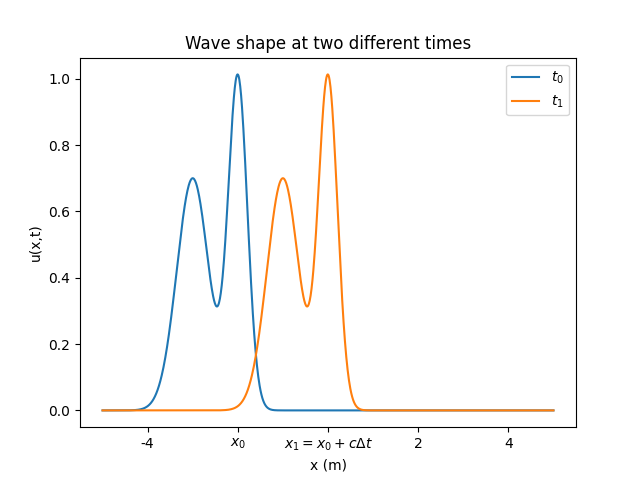

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x, u_t0)
plt.plot(x, u_t1)
#plt.vline(x_0)
#plt.vline(x_1)
plt.xlabel('x (m)')
plt.ylabel('u(x,t)')
plt.title('Wave shape at two different times')
plt.legend(['$t_0$', '$t_1$'])
ax.set_xticks([2*n-4 for n in range(5)]) # + [x_0, x_1])
ax.set_xticklabels([-4, '$x_0$', '$x_1 = x_0 + c \Delta t $', 2, 4])
plt.show()

### c) Phase at arbitrary $(x,t)$

Let's just define $s(x,t) = x - c t$ the phase at an arbitrary point $x$ and an arbitrary time $t$.

### d) Sensor at $x_{obs,0}$

Now assume that a sensor at point $x_{obs,0}$ gives us the temporal evolution of the altitude of the string at this same point. The phase of the signal at any time $t$ and at point $x_{obs,0}$ is (recall that $t_0 = 0$)

$$
s(x_{obs,0},t) = x_{obs,0} - c t = x_{obs,0} - c t_0 - c (t - t_0) = s(x_{obs,0}, t_0) - c t. 
$$

Thus, at an arbitrary $t$, the phase of our wave at point $x_{obs,0}$ is shifted by $t$ compared to the one at the same point and time $t_0 = 0$. Additionnally, the temporal shape of the signal at $x_{obs,0}$ is simply

$$
u(x_{obs,0}, t) = \nu(s(x,t)) = \nu(s(x_{obs,0}, 0) - c t).
$$

Note, and observe on the following figure, that : 

- the '$-$' sign in the argument of $\nu$ in the expression above : at a fixed position, the temporal evolution of $u$ will be opposite to the evolution of $u$ along the $x$-axis. Try to think about it : for a wave coming from the left, the sensor at point $x_{obs, 0}$ will see the right side of the wave before its left side. It also means that a sensor located at point $x_{obs,1} > x_{obs,0}$ will see the wave before the first sensor.

- the $c$ factor in the argument of $\nu$ : a translation $\Delta x$ to the right in space (along the $x$-axis) is equivalent to a translation of $\dfrac{\Delta t}{c}$ to the right along the temporal axis. The temporal evolution of $u$ will not only be reversed compard to its spatial evolution, but also compressed if $c>1$ (in other words, the wave is traveling 'fast', so the signal observed by the sensor is 'short'), and expanded if $c>1$ (the other way around).

In [7]:
t = copy.deepcopy(s_vect) # our x-axis

# At position x0
#x_0 = 0 # m
s_x0 = x_0 - c*t # phase of the wave at t0
u_x0 = waveform(s_x0) # the shape of the wave at t0 is just a function of the phase at t0

# At position x_1
#x_1 = 2 # m
s_x1 = x_1 - c*t # phase of the wave at t0
u_x1 = waveform(s_x1) # the shape of the wave at t0 is just a function of the phase at t0


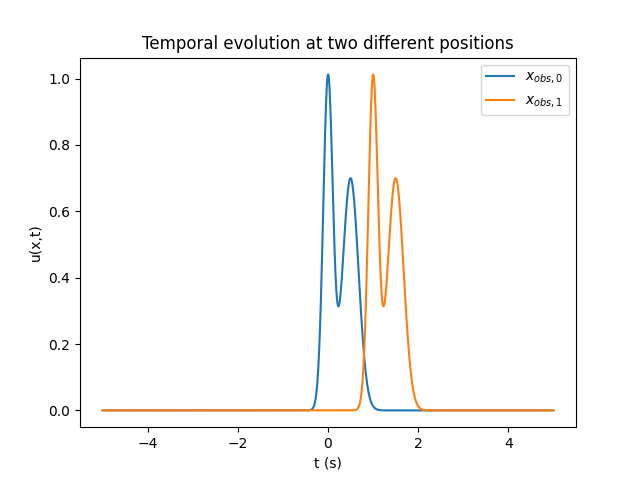

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(t, u_x0)
plt.plot(t, u_x1)
#plt.vline(x_0)
#plt.vline(x_1)
plt.xlabel('t (s)')
plt.ylabel('u(x,t)')
plt.title('Temporal evolution at two different positions')
plt.legend(['$x_{obs,0}$', '$x_{obs,1}$'])
#ax.set_xticks([2*n-4 for n in range(5)] + [x_0, x_1])
#ax.set_xticklabels([-4, '$x_0$', '$x_1 = x_0 + c \Delta t $', 2, 4])
plt.show()

## 4. Propagation of a retrograde wave

Try to follow the same track as we just did for the progressive wave. Also try to reproduce my code, you just have to change the $-$'s in $+$'s in the different expressions of $s$.

Spoilers :
- For a retrograde wave, the wave propagades in the negative $x$ direction with increasing time.
- the temporal shape of the wave is not reversed compared to its spatial shape. However, it's still compressed if $c>1$, and expanded if $c<1$.